In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

what is ``torch.nn`` ->  https://pytorch.org/docs/stable/nn.html#pooling-layers

### Kursta hep bahsedilen videolar:
1. ``Gradient descent`` ile ilgili olan --> https://www.youtube.com/watch?v=IHZwWFHWa-w
2. ``Backpropagation`` ile ilgili olan --> https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [2]:
torch.__version__

'2.1.2+cpu'

| Topic	   | Contents |
|----------|----------|
| 1. Getting data read | Data can be almost anything but to get started we're going to create a simple straight line  | 
| 2. Building a model | Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.   | 
|3. Fitting the model to data (training) | We've got data and a model, now let's let the model (try to) find patterns in the (training) data.
|4. Making predictions and evaluating a model (inference) | Our model's found patterns in the data, let's compare its findings to the actual (testing) data.
|5. Saving and loading a model | You may want to use your model elsewhere, or come back to it later, here we'll cover that.
|6. Putting it all together | Let's take all of the above and combine it.


### 1. Data (preparing and loading)


In [3]:
weight = 0.89
bias = 0.2

In [4]:
X = torch.arange(start= 0, end= 1, step= 0.01).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.2000],
         [0.2089],
         [0.2178],
         [0.2267],
         [0.2356],
         [0.2445],
         [0.2534],
         [0.2623],
         [0.2712],
         [0.2801]]))

In [5]:
len(X), len(y)

(100, 100)

### Split data into training and test sets


In [6]:
train_split = int(0.8 * len(X))
train_split

80

In [7]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [8]:
print(f"X train size: {len(X_train)}")
print(f"X test size: {len(X_test)}")
print(f"y train size: {len(y_train)}")
print(f"y test size: {len(y_train)}")


X train size: 80
X test size: 20
y train size: 80
y test size: 80


In [9]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  plt.figure(figsize=(5, 5))

  plt.scatter(train_data, train_labels, c="b", s=6, label="Training data")
  
  plt.scatter(test_data, test_labels, c="g", s=6, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10});

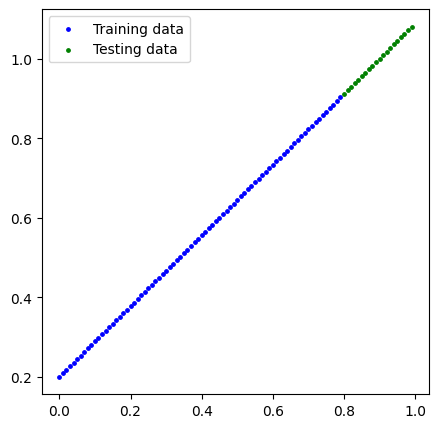

In [10]:
plot_predictions()
plt.savefig("grafik")

``torch parameter`` -> https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter

## 2. Build model


In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad= True,
                                            dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad= True,
                                             dtype= torch.float))
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [12]:
torch.manual_seed(42) # random state

new_model = LinearRegressionModel()
list(new_model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
new_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
torch.manual_seed(42)

newest_model = LinearRegressionModel()
list(newest_model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
newest_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

``state_dict()`` komutu, PyTorch modellerinin öğrenilmiş parametrelerini ve durumunu içeren bir sözlük (dictionary) nesnesini döndürür. Bu, bir PyTorch modelinin eğitimi sırasında öğrenilmiş tüm ağırlık matrislerini, bias vektörlerini ve diğer öğrenilmiş parametreleri içerir.

``torch.inference_mode()`` komutu, PyTorch 1.6.0 sürümünden itibaren kullanılan bir işlevdir. Bu işlev, PyTorch'un model çıkarım modunu (inference mode) açıp kapatmaya yarar. Model çıkarım modu, modelin eğitim sırasında veya çıkarım sırasında davranışını değiştirir.

Model eğitimi sırasında, genellikle modelde **dropout** ve benzeri **regularizasyon** katmanları kullanılır. Ancak modelin çıkarım sırasında, bu regularizasyon katmanları genellikle devre dışı bırakılır çünkü modelin performansını etkileyebilirler.

torch.inference_mode() işlevi, bu regularizasyon katmanlarının (örneğin, dropout) etkinliğini kontrol etmek için kullanılır. **Varsayılan olarak, model çıkarım modu açıktır ve regularizasyon katmanları devre dışı bırakılmıştır**. Ancak, modelin çıkarım sırasında regularizasyon katmanlarını etkinleştirmek isterseniz, torch.inference_mode(False) çağrısını yaparak model çıkarım modunu kapatabilirsiniz.

In [16]:
with torch.inference_mode():
    y_preds = newest_model(X_test)

y_preds

tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285],
        [0.4318],
        [0.4352],
        [0.4386],
        [0.4419],
        [0.4453],
        [0.4487],
        [0.4520],
        [0.4554],
        [0.4588],
        [0.4621]])

In [17]:
y_preds = newest_model(X_test)
y_preds

tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285],
        [0.4318],
        [0.4352],
        [0.4386],
        [0.4419],
        [0.4453],
        [0.4487],
        [0.4520],
        [0.4554],
        [0.4588],
        [0.4621]], grad_fn=<AddBackward0>)

1. with torch.inference_mode():
2.    y_preds = newest_model(X_test)

- y_preds = newest_model(X_test)

kodları arasındaki fark : ``grad_fn=<AddBackward0>``



In [18]:
y_test

tensor([[0.9120],
        [0.9209],
        [0.9298],
        [0.9387],
        [0.9476],
        [0.9565],
        [0.9654],
        [0.9743],
        [0.9832],
        [0.9921],
        [1.0010],
        [1.0099],
        [1.0188],
        [1.0277],
        [1.0366],
        [1.0455],
        [1.0544],
        [1.0633],
        [1.0722],
        [1.0811]])

plot_predictions(predictions=y_preds.cpu())
plt.savefig("first predictions")

### torch.no_grad() vs torch.inference_mode():
``torch.no_grad()`` gradyan hesaplamalarını devre dışı bırakırken, ``torch.inference_mode()`` modelin çıkarım modunu kontrol eder. İkisi farklı amaçlara hizmet eder ve farklı etkileri vardır.

##### torch.nn Loss Functions: https://pytorch.org/docs/stable/nn.html#loss-functions
##### torch.optim = optimizer : https://pytorch.org/docs/stable/optim.html#optimizer-step

###### loss function == cost function == criterion in different areas



## 3. Train model

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to *parameters* as patterns), the `weights` and `bias` values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

We could hard code this (since we know the default values `weight=0.7` and `bias=0.3`) but where's the fun in that?

Much of the time you won't know what the ideal parameters are for a model.

Instead, it's much more fun to write code to see if the model can try and figure them out itself.



### Creating a loss function and optimizer in PyTorch

For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a **loss function** as well as an **optimizer**.

The rolls of these are: 

| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how wrong your models predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimizer** | Tells your model how to update its internal parameters to best lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)).

In [19]:
loss_function = nn.L1Loss()
loss_function

L1Loss()

In [20]:
optimizer = torch.optim.SGD(params=newest_model.parameters(),
                            lr= 0.01)
optimizer

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

- weigth and bias --> parameter
- learning rate(lr), epoch --> hyperparameter

### PyTorch training loop steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` | 
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

 * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
 * Zero gradients (`optimizer.zero_grad()`) *before* stepping them (`optimizer.step()`).
 * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).

In [21]:
torch.manual_seed(42)

epochs = 100
# Pytorch Training Loop
for epoch in range(epochs):
    newest_model.train()
    # 1. Forward pass
    y_pred = newest_model(X_train)
    # 2. Calculate the loss
    loss = loss_function(y_pred, y_train)
    #print(f"loss: {loss}")
    # 3. Zero Gradients
    optimizer.zero_grad()
    # 4. Peform backpropagation on the loss
    loss.backward()
    # 5. Update the optimizer(gradient descent)
    optimizer.step()

    newest_model.eval()
    with torch.inference_mode():
        test_pred = newest_model(X_test)

        test_loss = loss_function(test_pred,y_test)
    
    if epoch % 10 == 0:
        print(f"{epoch+10}.epoch| Loss: {loss} | Test Loss {test_loss}")
        print(newest_model.state_dict())

10.epoch| Loss: 0.2897478938102722 | Test Loss 0.5528675317764282
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
20.epoch| Loss: 0.1778218299150467 | Test Loss 0.42056408524513245
OrderedDict([('weights', tensor([0.3801])), ('bias', tensor([0.2358]))])
30.epoch| Loss: 0.11804261058568954 | Test Loss 0.32326850295066833
OrderedDict([('weights', tensor([0.4170])), ('bias', tensor([0.3001]))])
40.epoch| Loss: 0.0943593755364418 | Test Loss 0.26118627190589905
OrderedDict([('weights', tensor([0.4481])), ('bias', tensor([0.3343]))])
50.epoch| Loss: 0.08455128967761993 | Test Loss 0.22276751697063446
OrderedDict([('weights', tensor([0.4737])), ('bias', tensor([0.3498]))])
60.epoch| Loss: 0.0792960375547409 | Test Loss 0.19815583527088165
OrderedDict([('weights', tensor([0.4956])), ('bias', tensor([0.3548]))])
70.epoch| Loss: 0.07544515281915665 | Test Loss 0.1822928488254547
OrderedDict([('weights', tensor([0.5150])), ('bias', tensor([0.3533]))])
80.epoch| Loss: 0.0

In [22]:
newest_model.state_dict()

OrderedDict([('weights', tensor([0.5831])), ('bias', tensor([0.3291]))])

In [23]:
weight,bias

(0.89, 0.2)

In [24]:
with torch.inference_mode():
    y_preds_new = newest_model(X_test)

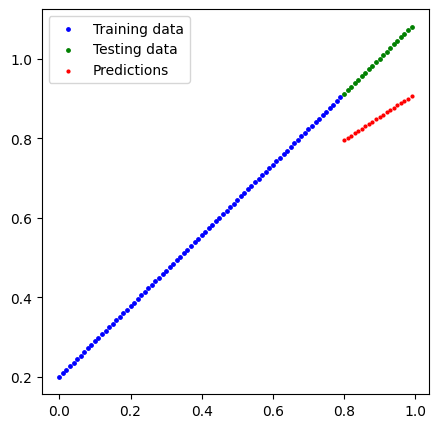

In [25]:
plot_predictions(predictions=y_preds_new)
plt.savefig("second predictions")